# Decision Tree
Decision tree is very popular machine learning technique for classification or regression. It recursively partitions the input space into smaller sub-regions such that input-output relation of each sub-region can be modeled using a very simple function (e.g. constant function). Once the partioning of the input space into sub-regions is done, it learns a (simple) predictor for each sub-region using only those train samples which belongs to that sub-region. Prediction for an unseen test sample is done first finding the sub-region into which the test sample belongs, and then getting the output from the predictor of that sub-region.

Let, during training on dataset, the decision tree partitions the input space into the following sub-regions: $\mathcal{R}=\{R_1, \dots, R_l\}$. For, the $i$-th sub-region, the trained classifier is $f_i(\cdot)$ (note that $f_i(\cdot)$ is a constant function in general). Thus, prediction for a new test sample $\tilde{\mathbf{x}}$ is done as
$$\hat{y} = \sum_{i=1}^l \mathbb{I}_{\tilde{\mathbf{x}}\in R_i}f_i(\tilde{\mathbf{x}})$$
where $\mathbb{I}_{<cond>}$ takes the value $1$ if the condition $<cond>$ is satified and $0$ otherwise.

# Classification using Decision Tree
The Scikit-learn provides the class <em>sklearn.tree.DecisionTreeClassifier</em> to preform classification using decision tree. The complete documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier).

## Example of Classification using Decision Tree
The original code can be found [here](https://scikit-learn.org/stable/modules/tree.html).

### Importing the necessary modules

In [2]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

### Preparing the Dataset

In [3]:
iris = load_iris()
print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [4]:
X, y = iris.data, iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


### Training the Decision Tree Classifier

In [5]:
clf = DecisionTreeClassifier(criterion='gini', # {“gini”, “entropy”, “log_loss”}
                             splitter='best', # {“best”, “random”}
                             max_depth=None,
                             min_samples_split=2,
                             min_samples_leaf=1,
                             max_leaf_nodes=None,
                             min_impurity_decrease=0.0)
clf = clf.fit(X_train, y_train)

In [6]:
clf.predict(X_test[:5])

array([2, 1, 0, 2, 0])

In [7]:
clf.predict_proba(X_test[:5])

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [8]:
clf.score(X_test, y_test)

1.0

## Visualizing the Tree
The original code can be found [here](https://scikit-learn.org/stable/modules/tree.html).

[Text(0.5, 0.9166666666666666, 'x[2] <= 2.35\ngini = 0.665\nsamples = 120\nvalue = [39, 37, 44]'), Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]'), Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.496\nsamples = 81\nvalue = [0, 37, 44]'), Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]'), Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.056\nsamples = 35\nvalue = [0, 34, 1]'), Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]'), Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'), Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'), Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'), Text(0.46153846153846156, 0.08333333333333333, 'gini = 0.0\nsam

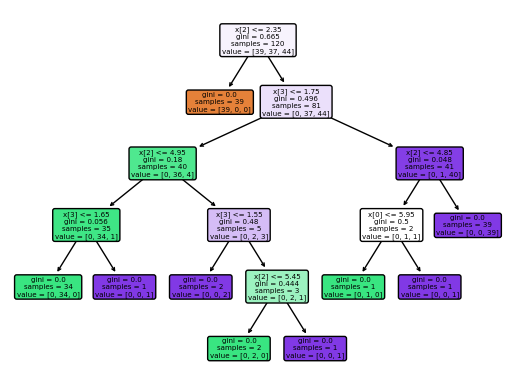

In [9]:
from sklearn import tree
print(tree.plot_tree(clf, filled=True, rounded=True))

Alternative, the [graphviz](https://graphviz.org/) package can be used to visualized the decision tree.

In [10]:
import graphviz
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=iris.feature_names,
                                class_names=iris.target_names,
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)

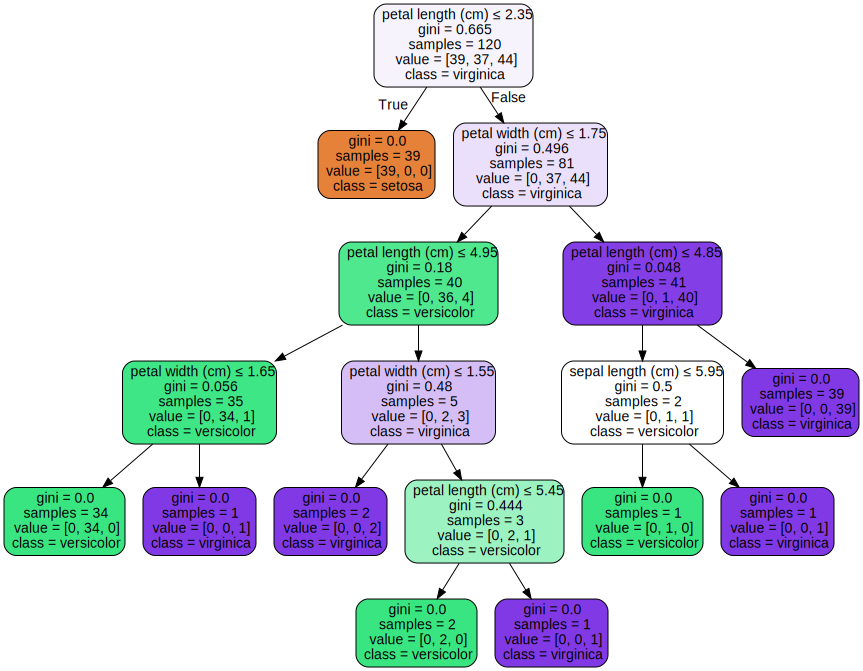

In [11]:
graph

Saving the figure in a pdf file

In [12]:
graph.render("iris")

'iris.pdf'

In [13]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 16 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.2 [186 kB]
Fetched 186 kB in 1s (125 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 120893 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.2_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.2) ...
Setting up poppler-utils (22.02.0-2ubuntu0.2) ...
Processing triggers for man-db (2.10.2-1) ...


In [14]:
!pip install pdf2image

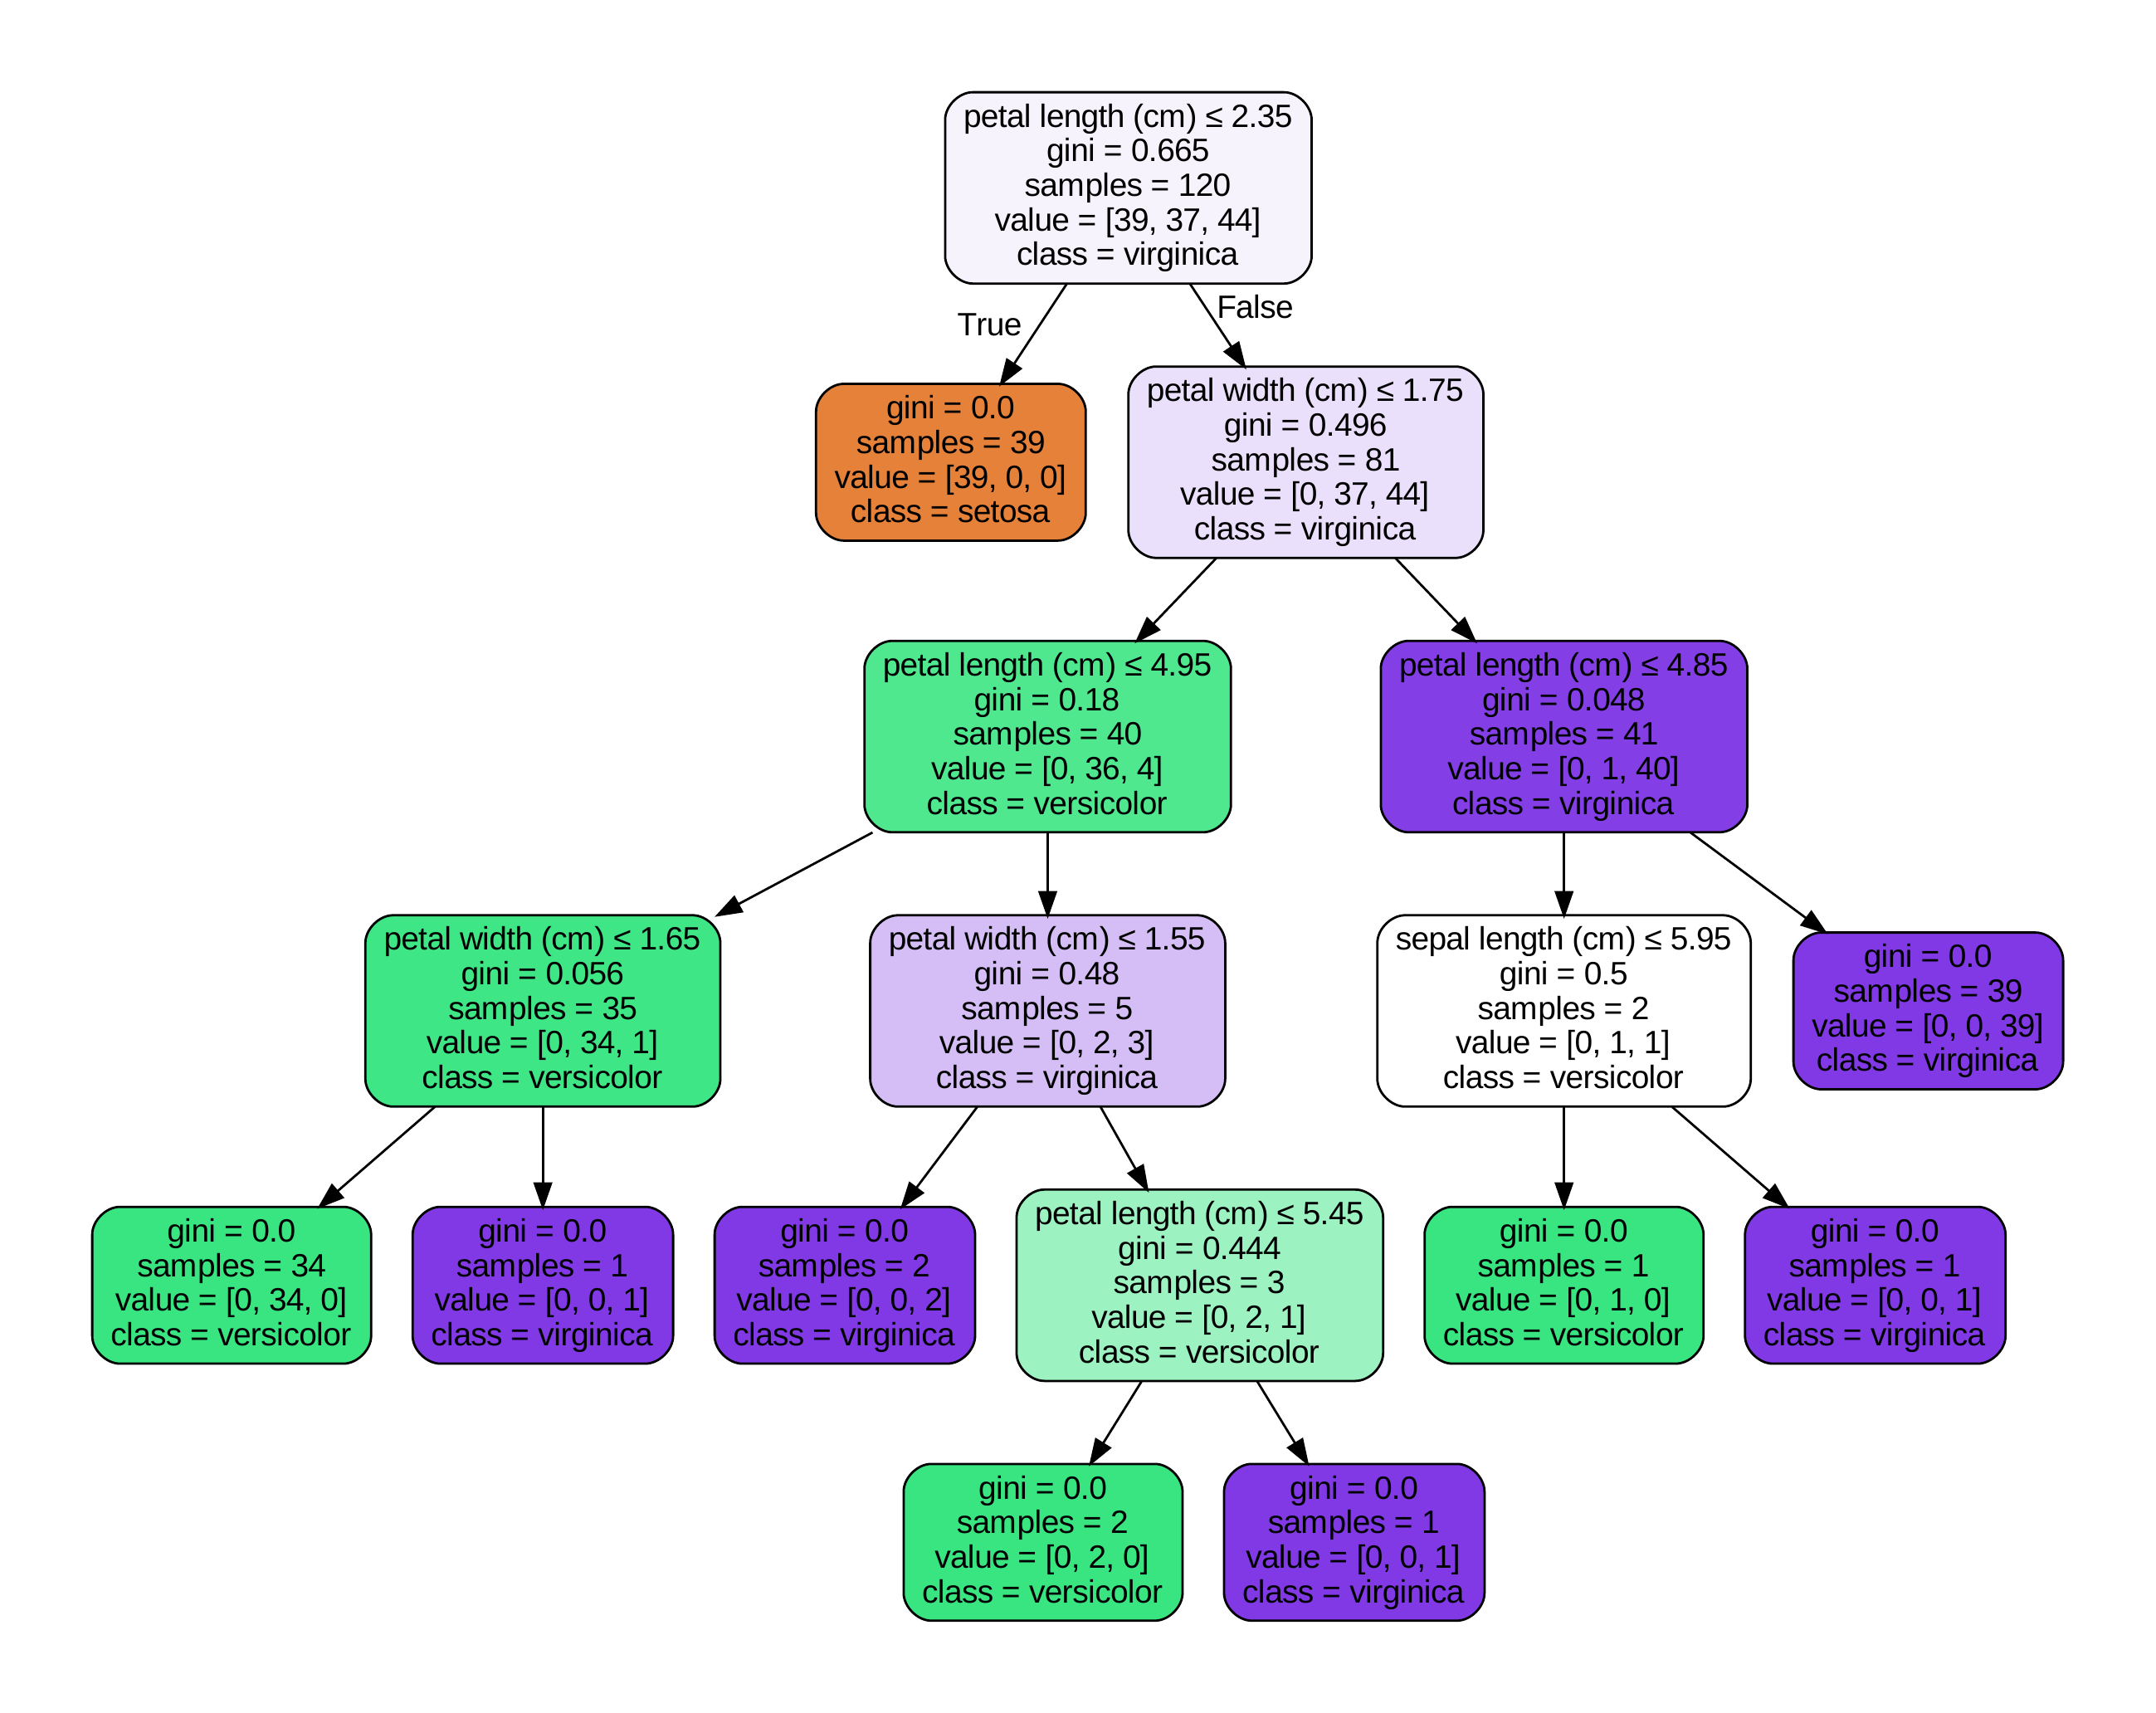

In [15]:
from pdf2image import convert_from_path

images = convert_from_path("iris.pdf")
images[0]  # first page

### Observing the decision rules in a nexted structure

In [16]:
from sklearn.tree import export_text
r = export_text(clf, feature_names=iris['feature_names'])
print(r)

|--- petal length (cm) <= 2.35
|   |--- class: 0
|--- petal length (cm) >  2.35
|   |--- petal width (cm) <= 1.75
|   |   |--- petal length (cm) <= 4.95
|   |   |   |--- petal width (cm) <= 1.65
|   |   |   |   |--- class: 1
|   |   |   |--- petal width (cm) >  1.65
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.95
|   |   |   |--- petal width (cm) <= 1.55
|   |   |   |   |--- class: 2
|   |   |   |--- petal width (cm) >  1.55
|   |   |   |   |--- petal length (cm) <= 5.45
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- petal length (cm) >  5.45
|   |   |   |   |   |--- class: 2
|   |--- petal width (cm) >  1.75
|   |   |--- petal length (cm) <= 4.85
|   |   |   |--- sepal length (cm) <= 5.95
|   |   |   |   |--- class: 1
|   |   |   |--- sepal length (cm) >  5.95
|   |   |   |   |--- class: 2
|   |   |--- petal length (cm) >  4.85
|   |   |   |--- class: 2



## Ploting the Decision Surface
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py).

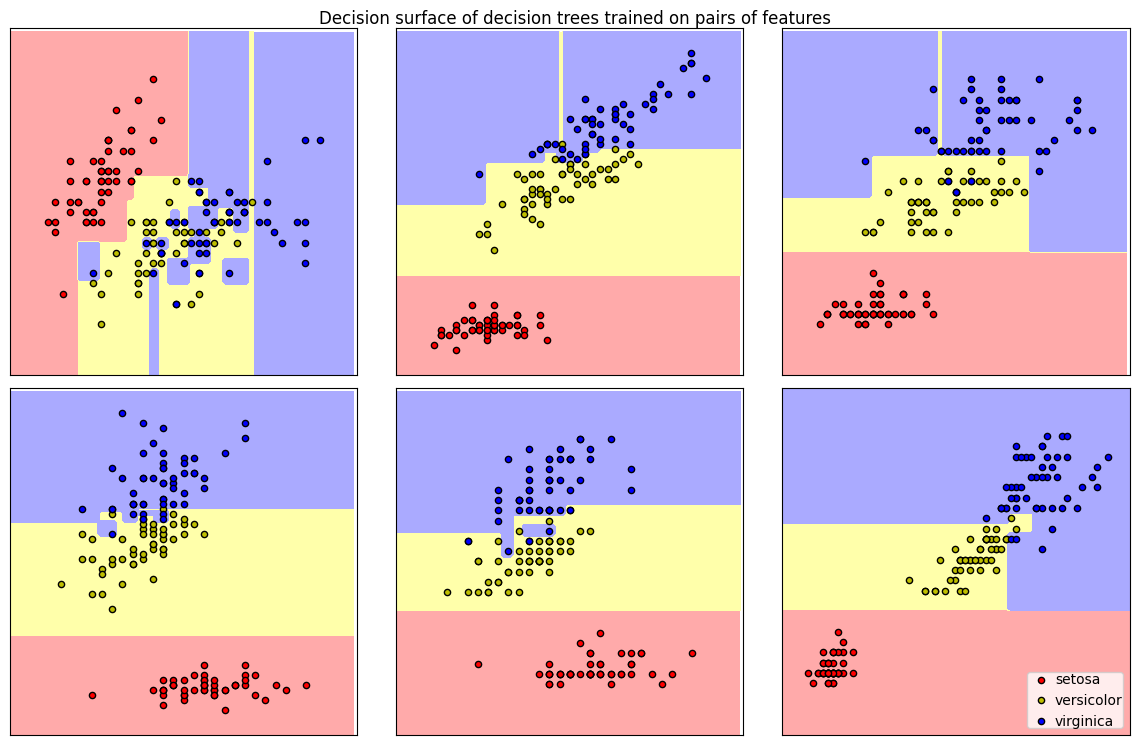

In [17]:
from matplotlib.colors import ListedColormap

# Parameters
n_classes = 3
plot_colors = "ryb"

figure = plt.figure(figsize=(12, 8))
for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.mgrid[x_min:x_max:(x_max-x_min)/100, y_min:y_max:(y_max-y_min)/100.]
    grid = np.c_[xx.ravel(), yy.ravel()]

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    ax = plt.subplot(2, 3, pairidx + 1)
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    cm_light = ListedColormap(["#FFAAAA", "#FFFFAA","#AAAAFF"])
    probs = clf.predict(grid)
    probs = probs.reshape(xx.shape)
    ax.contourf(xx, yy, probs, cmap=cm_light)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            edgecolor="k",
            s=20,
        )

plt.suptitle("Decision surface of decision trees trained on pairs of features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
_ = plt.axis("tight")

# Regression using Decision Tree
The Scikit-learn provides the class <em>sklearn.tree.DecisionTreeRegressor</em> to preform classification using decision tree. The complete documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor).

### Importing the necessary modules

In [18]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import load_diabetes

### Preparing the dataset

In [19]:
X, y = load_diabetes(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


### Training the regressor

In [20]:
regressor = DecisionTreeRegressor(criterion='squared_error',
                                  splitter='best',
                                  max_depth=None,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  random_state=0)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [21]:
regressor.predict(X_test[:5])

array([261., 252., 202., 202.,  52.])

In [22]:
regressor.score(X_test, y_test)

-0.34397344448845835

## Plotting the Regression Curve
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html#sphx-glr-auto-examples-tree-plot-tree-regression-py).

### Creating the dataset

In [23]:
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

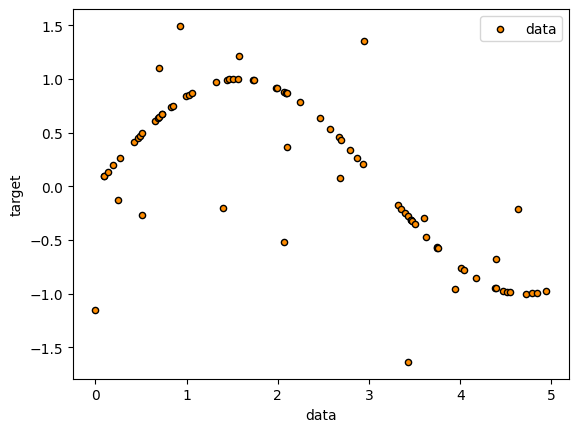

In [24]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.legend()
plt.show()

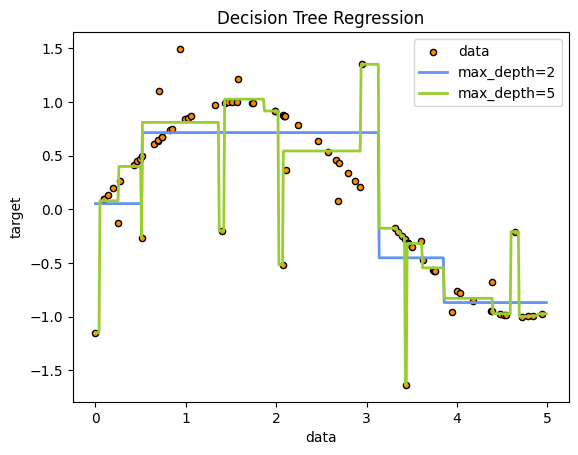

In [25]:
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# Minimal Cost-Complexity Pruning
Minimal cost-complexity pruning is a method for pruning a decision tree to avoid overfitting. In this method, the following cost-complexity measure is minimized:
$$R_{\alpha}(T)=R(T)+\alpha|\tilde{T}|$$
where $R(T)$ can be some standard decision tree cost (e.g. misclassification rate for classification, mean squared error for regression), $|\tilde{T}|$ is the number of leaf nodes and $\alpha$ is a hyper-parameter (known as complexity parameter).

## Minimal cost-complexity pruning using Scikit-learn
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html).

### Importing the ncessary modules

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

### Preparing the dataset

In [27]:
X, y = load_breast_cancer(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Total impurity of leaves vs effective alphas of pruned tree

In [28]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

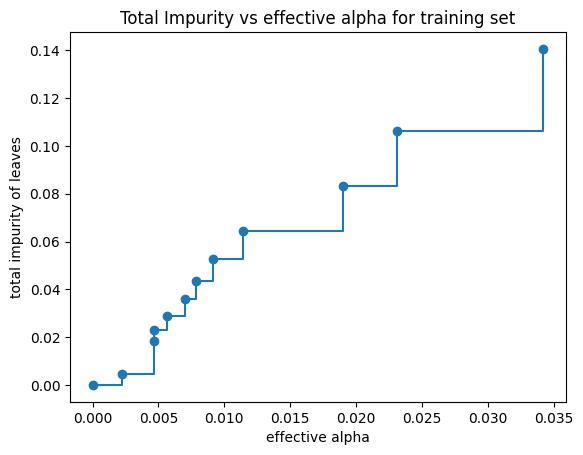

In [29]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

### Training of decision tree using the effective alphas

In [30]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.3272984419327777


### Number of nodes and tree depth vs alpha

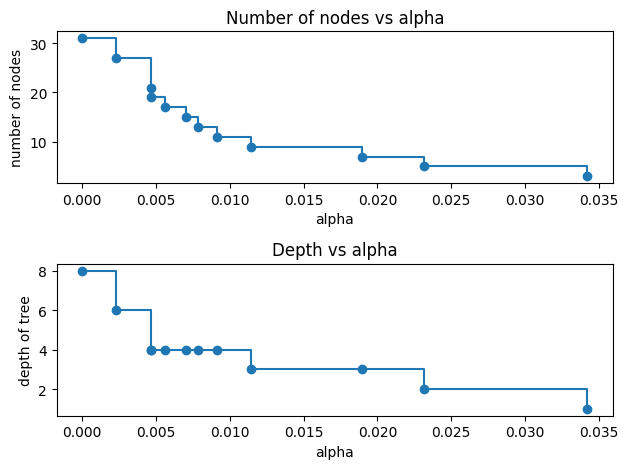

In [31]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Selecting the right alpha

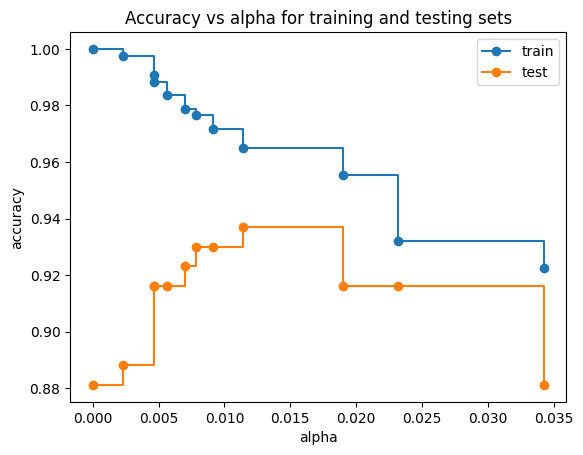

In [32]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()